In [ ]:
# To start pre-processing our and Training our data for the regression model; we will first identify our Dependent Variables 
# or the response variable
# in this case AdultWeekday and AdultWeeked 
# The remaining columns as indepedependent variables or predictor variables


In [27]:
# PRE-PROCESSING
# imput missing values done in step3 already
# reloading the CleanData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file='Data3.csv'
Data4 = pd.read_csv(file)
Data4.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,72.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,72.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [2]:
# Encoding the categorical Columns

In [17]:
#Using OneHotEncoding
#First Creating dumies variables for Name column


In [28]:
#First Creating dumies variables for Region column
Regiondummies = pd.get_dummies(Data4.Region)
Regiondummies.head()

,Alaska,Arizona,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,...,Sierra Nevada,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# #First Creating dumies variables for state column
statedummies = pd.get_dummies(Data4.state)
statedummies.head()

,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
Data4.shape

(330, 27)

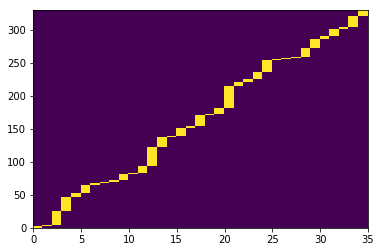

In [31]:
plt.pcolor(statedummies.values)

In [32]:
# Merging the Name dummies to CleanData
EncodedData4 = pd.concat([Data4, Regiondummies, statedummies], axis= 'columns')
EncodedData4.head(5)


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
EncodedData4.describe()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.00000,330.000000,...,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,4591.818182,1215.427273,3374.000000,0.172727,0.003030,0.184848,1.018182,0.933333,1.50000,1.833333,...,0.003030,0.006061,0.003030,0.039394,0.045455,0.012121,0.030303,0.012121,0.048485,0.024242
std,3735.535934,947.864557,3117.121621,0.559946,0.055048,0.651685,2.198294,1.312245,1.61913,1.815028,...,0.055048,0.077731,0.055048,0.194826,0.208615,0.109593,0.171680,0.109593,0.215115,0.154035
min,315.000000,60.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1403.750000,461.250000,869.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3127.500000,964.500000,1561.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7806.000000,1800.000000,6325.250000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13487.000000,4425.000000,10800.000000,4.000000,1.000000,6.000000,15.000000,8.000000,8.00000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
#Drop the original Name region and state columns
NewData4 = EncodedData4.drop(['Name', 'Region', 'state'], axis='columns')
NewData4.head


<bound method NDFrame.head of      summit_elev  vertical_drop  base_elev  trams  fastEight  fastSixes  \
0           3939           2500        250      1        0.0          0   
1           2600           1540       1200      0        0.0          0   
2           2090            294       1796      0        0.0          0   
3          11500           2300       9200      0        0.0          1   
4          11100           1800       9200      0        0.0          0   
5           7800            600       7200      0        0.0          0   
6           8805           1665       7140      0        0.0          0   
7           8500           1900       6600      0        0.0          1   
8           7700            500       7200      0        0.0          0   
9           8200           1600       6600      0        0.0          0   
10          8012            750       7031      0        0.0          0   
11         10067           3500       7170      2        0.0          

In [13]:
#Dropping one of the dummy variable to avoid the dummy variable trap
#Sklearn is aware of the variable trap and will drop one column automaticaly

In [ ]:
# INVESTIGATING ANOMALITIES AND OUTLIERS USING A BOX PLOT

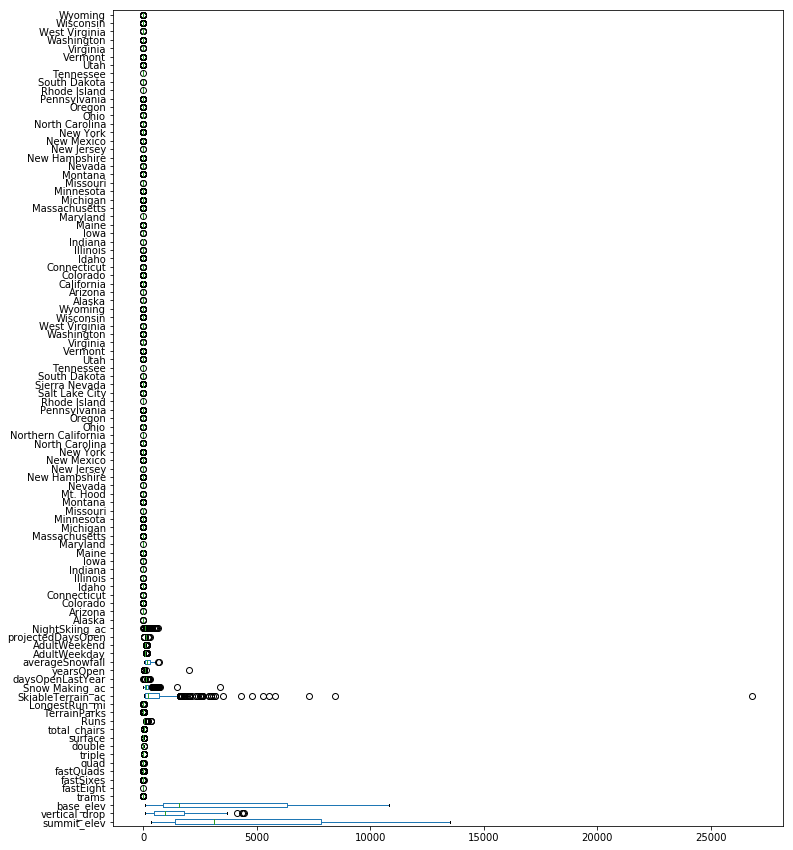

In [46]:
# Creating boxplot for every column in Data
boxplot = NewData4.boxplot(grid = False, fontsize = 10,vert = False, figsize=(12,15))

In [42]:
# Finding the Interquartile range or IQR that is Q3-Q1
#Finding the first Quartile Q1
Q1 = NewData4.quantile(0.25)
# Finding the 3rd Quartile Q3
Q3= NewData4.quantile(0.75)
# Calculating the interquartile range Q3
IQR = Q3-Q1
IQR.head()


summit_elev      6402.25
vertical_drop    1338.75
base_elev        5456.25
trams               0.00
fastEight           0.00
dtype: float64

In [43]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [44]:
lower_limit.head()

summit_elev     -8199.625
vertical_drop   -1546.875
base_elev       -7315.375
trams               0.000
fastEight           0.000
dtype: float64

In [45]:
upper_limit.head()

summit_elev      17409.375
vertical_drop     3808.125
base_elev        14509.625
trams                0.000
fastEight            0.000
dtype: float64

In [48]:
# Removing the outliers from the Dataframe
Data4_no_outliers = NewData4[(NewData4>lower_limit)&(NewData4<upper_limit)]
Data4_no_outliers

ValueError: cannot reindex from a duplicate axis

In [51]:
NewData4.duplicated().sum()

0

In [53]:
#investigating for Duplicate axis
NewData4[NewData4.index.duplicated()]

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [56]:
#Saving NewData4 as csv
NewData4.to_csv('NewData4.csv', index= False)

In [65]:
# removing duplicate indexes 
df = NewData4.reset_index().drop_duplicates(subset='index', keep='last').set_index('index').sort_index()
df.head()

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
index,,,,,,,,,,,,,,,,,,,,,
0,3939,2500,250,1,0.0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600,1540,1200,0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,2090,294,1796,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11500,2300,9200,0,0.0,1,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4,11100,1800,9200,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Filtering outliners from our existing DataFrame and assigning 
# We will assign a new variable Data3WNO  to anew data frame containing our original DataFrame with no outliers
Data4_no_outliers = df[((df<(Q1 - 1.5 * IQR)) |(df>(Q3 + 1.5 * IQR))).any(axis=1)]

ValueError: cannot reindex from a duplicate axis

In [14]:
#PLOTING A SCATTER PLOT TO CHECK IF LINEAR REGRESSION WOULD BE APPROPRIATE



In [15]:
NewCleanData.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


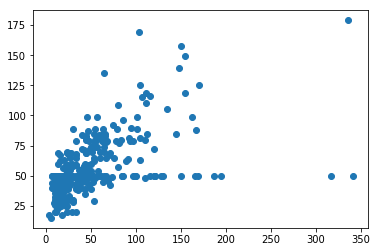

In [16]:
plt.scatter(NewCleanData['Runs'], NewCleanData['AdultWeekday'])

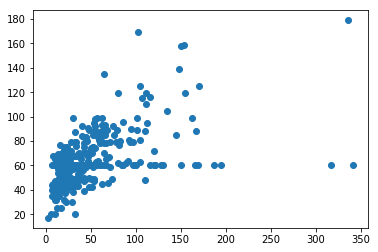

In [17]:
plt.scatter(NewCleanData['Runs'], NewCleanData['AdultWeekend'])

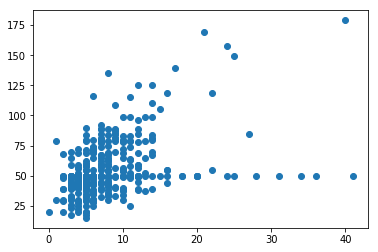

In [18]:
plt.scatter(NewCleanData['total_chairs'], NewCleanData['AdultWeekday'])

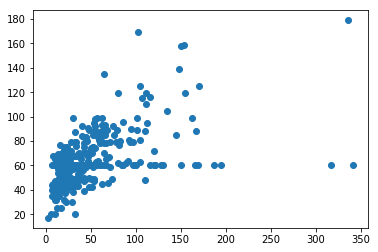

In [19]:
plt.scatter(NewCleanData['Runs'], NewCleanData['AdultWeekend'])

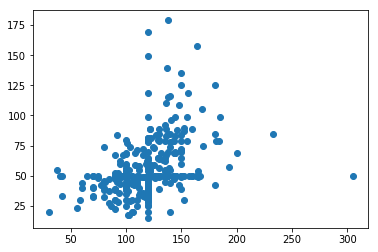

In [20]:
plt.scatter(NewCleanData['projectedDaysOpen'], NewCleanData['AdultWeekday'])

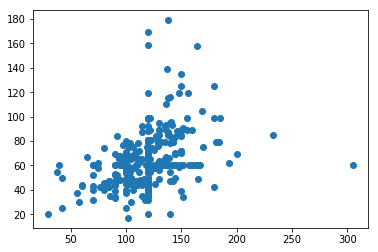

In [21]:
plt.scatter(NewCleanData['projectedDaysOpen'], NewCleanData['AdultWeekend'])

In [ ]:
# Examimining Multicollinearity 

In [ ]:
len(X_Test)